In [1]:
# Import packages
import os
import geopandas as gpd
import numpy as np
from osgeo import gdal
import rasterio
import rasterio.mask
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\geospatial_internship\\datasets')
shape_telangana = gpd.read_file('telangana_shapefile.geojson')
shape_telangana = shape_telangana.explode()

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\tsdm\\')
mandal_boundaries = gpd.read_file('Mandal_Boundary.shp')

C:\Users\Jesse\AppData\Local\Temp\ipykernel_7600\738781860.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  shape_telangana = shape_telangana.explode()


# 10 km Resolution PM2.5 Data (1998-2019)

In [3]:
path = 'c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\V5GL02.HybridPM25c_0p10.Asia.200911-200911.nc'
nc_metadata = nc.Dataset(path)
nc_metadata
# Import the netCDF data for Leaf Area Index
nc_file = gdal.Open('NETCDF:c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\V5GL02.HybridPM25c_0p10.Asia.200911-200911.nc:GWRPM25')
# Convert the netCDF to Geotiff file
tif_file = gdal.Translate('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\PM25_tiff.tif', nc_file)

# In the next two code blocks, we crop the Geotiff file to Burnt Area in Telangana
ba_data = "c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\PM25_tiff.tif"
with rasterio.open(ba_data) as src:
    out_image, out_transform = rasterio.mask.mask(src, shape_telangana.geometry, crop=True)
    out_meta = src.meta

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

# Save the Geotiff file to Burnt Area in Telangana
with rasterio.open("c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\PM25_cropped.tif", "w", **out_meta) as dest:
    dest.write(out_image)

from rasterstats import zonal_stats


os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre')
tiff = 'PM25_cropped.tif'
lulc = rasterio.open(tiff, mode = 'r')
lulc_array = lulc.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
# affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
affine = lulc.transform

mandal_boundaries['PM25'] = 0
for i in range(0, len(mandal_boundaries)):
    try:
        test = zonal_stats(mandal_boundaries.iloc[i].geometry, lulc_array, affine = affine, geojson_out = True, nodata = lulc.nodata)
        mandal_boundaries['PM25'].iloc[i] = test[0]['properties']['mean']
    except:
        mandal_boundaries['PM25'].iloc[i] = 0

    

C:\Users\Jesse\AppData\Local\Temp\ipykernel_7600\857351717.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mandal_boundaries['PM25'].iloc[i] = test[0]['properties']['mean']


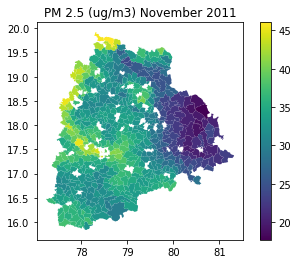

In [4]:
mandal_boundaries.plot(column = 'PM25', legend = True)
plt.title('PM 2.5 (ug/m3) November 2011')
plt.show()

In [5]:
path = 'c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\test.nc'
nc_metadata = nc.Dataset(path)
nc_metadata

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Title: Hybrid PM_2_._5 [\mug/m^3]
    Contact: Aaron van Donkelaar <aaron.vandonkelaar@wustl.edu>
    References: van Donkelaar et al., Monthly Global Estimates of Fine Particulate Matter and Their Uncertainty, Environ. Sci. & Tech., doi:10.1021/acs.est.1c05309.
    Filename: C:\Users\Aaron\Documents\MATLAB\PM25_wMelanie\GlobalMonthlyGWR-Geo20200504-GM20210824-V20210916\NetCDF\GWRPM25\Asia\Monthly\V5GL02.HybridPM25.Asia.200806-200806.nc
    Format: NetCDF-4
    Delta_Lat: 0.010000228881835938
    Delta_Lon: 0.0099945068359375
    SpatialCoverage: Asia
    Start_Date: 20080101
    End_Date: 20081231
    dimensions(sizes): lon(8000), lat(5500)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float32 GWRPM25(lat, lon)
    groups: 

In [6]:
path = 'c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\test.nc'
nc_metadata = nc.Dataset(path)
nc_metadata
# Import the netCDF data for Leaf Area Index
nc_file = gdal.Open('NETCDF:c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\test.nc:GWRPM25')
# Convert the netCDF to Geotiff file
tif_file = gdal.Translate('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\PM25_1km_tiff.tif', nc_file)

# In the next two code blocks, we crop the Geotiff file to Burnt Area in Telangana
ba_data = "c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\PM25_1km_tiff.tif"
with rasterio.open(ba_data) as src:
    out_image, out_transform = rasterio.mask.mask(src, shape_telangana.geometry, crop=True)
    out_meta = src.meta

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

# Save the Geotiff file to Burnt Area in Telangana
with rasterio.open("c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre\\PM25_1km_cropped.tif", "w", **out_meta) as dest:
    dest.write(out_image)

from rasterstats import zonal_stats


os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\BA_data_pre')
tiff = 'PM25_1km_cropped.tif'
lulc = rasterio.open(tiff, mode = 'r')
lulc_array = lulc.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
# affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
affine = lulc.transform
 

c:\Users\Jesse\Anaconda3\envs\test\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [7]:

zonal_stats(mandal_boundaries.iloc[0].geometry, lulc_array, affine = affine, geojson_out = True, nodata = lulc.nodata)  

[{'type': 'Feature',
  'properties': {'count': 0, 'min': None, 'max': None, 'mean': None},
  'geometry': {'type': 'Polygon',
   'coordinates': (((78.5902051280001, 17.345061132000126),
     (78.59009457400015, 17.345374923000065),
     (78.59008850900011, 17.34552354900012),
     (78.58797284200011, 17.345984881000106),
     (78.58673602900018, 17.346379628000022),
     (78.58558260100011, 17.346747761000188),
     (78.58604292100006, 17.347993072000065),
     (78.58727967300007, 17.35279078500014),
     (78.5876520270001, 17.354120622000096),
     (78.58795239, 17.355193348000057),
     (78.58817045000012, 17.356181197000183),
     (78.58829265500003, 17.35673480900016),
     (78.58830961700016, 17.356952445000047),
     (78.5884421360002, 17.358652887000062),
     (78.58848234200019, 17.3591687870001),
     (78.58842397700005, 17.35953358900008),
     (78.58816879500006, 17.360652672000015),
     (78.58814708800014, 17.360773839000046),
     (78.58658640400017, 17.361074421000012),
 

In [8]:

mandal_boundaries['PM25'] = 0
for i in range(0, len(mandal_boundaries)):
    try:
        test = zonal_stats(mandal_boundaries.iloc[i].geometry, lulc_array, affine = affine, geojson_out = True, nodata = lulc.nodata)
        mandal_boundaries['PM25'].iloc[i] = test[0]['properties']['mean']
    except:
        mandal_boundaries['PM25'].iloc[i] = 0


C:\Users\Jesse\AppData\Local\Temp\ipykernel_7600\1002176087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mandal_boundaries['PM25'].iloc[i] = test[0]['properties']['mean']
